**Vanilla Gradient Descent**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)
x = np.random.rand(100, 1) * 10
y = 2 * x + 1 + np.random.randn(100, 1)

In [ ]:
def gradient_descent(x, y, epochs, learning_rate):
    m = len(y)
    theta0 = 0
    theta1 = 0
    cost_history = []
    theta0_history = []
    theta1_history = []

    for i in range(epochs):
        h = theta0 + theta1 * x
        cost = np.sum((h - y)**2) / (2 * m)
        cost_history.append(cost)

        gradient0 = np.sum(h - y) / m
        gradient1 = np.sum((h - y) * x) / m

        theta0 = theta0 - learning_rate * gradient0
        theta1 = theta1 - learning_rate * gradient1

        theta0_history.append(theta0)
        theta1_history.append(theta1)

    return h, theta0_history, theta1_history, cost_history

In [ ]:
epochs = 1000
learning_rate = 0.01

h, theta0_history, theta1_history, cost_history = gradient_descent(x, y, epochs, learning_rate)

In [ ]:
r2_score(y, h)

0.9708048799711853

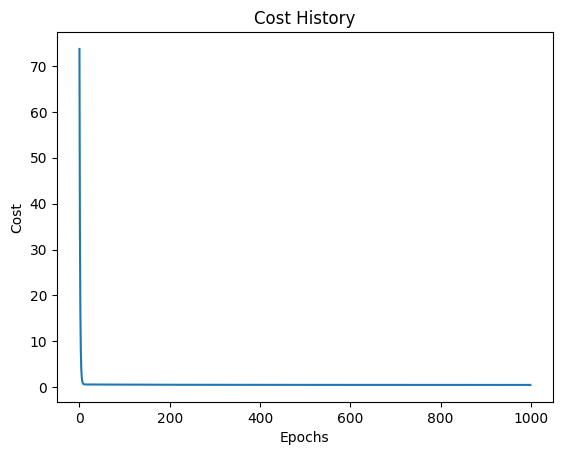

In [ ]:
plt.figure()
plt.plot(cost_history)
plt.title('Cost History')
plt.xlabel('Epochs')
plt.ylabel('Cost')

plt.show()

**Mini-Batch Gradient Descent**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [ ]:
x=np.linspace(0, 20, 50)
y=-2*x+1

In [ ]:
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [ ]:
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

In [ ]:
def  GD_single_Mini_Patches_LR(x,y,epochs,learning_rate,batches):
    m=len(y)
    theta0=0
    theta1=0
    cost_history=[]
    theta0_history=[]
    theta1_history=[]
    for e in range(epochs):
        for j in range(0,m,batches):
            x_batch=x[j:j+batches]
            y_batch=y[j:j+batches]
            h = theta0 + theta1*x_batch
            cost = sum([error**2 for error in (h-y_batch)]) / 2*m
            cost_history.append(cost)

            theta0 = theta0 - (learning_rate * np.sum(h-y_batch) / m)
            theta1 = theta1 - (learning_rate * (np.sum((h-y_batch)*x_batch) / m))

            theta0_history.append(theta0)
            theta1_history.append(theta1)
    return theta0_history,theta1_history,cost_history

In [ ]:
theta0_history,theta1_history,cost_history=GD_single_Mini_Patches_LR(x,y,1000,0.004,10)
h= theta0_history[-1] + theta1_history[-1]*x

In [ ]:
r2_score(y, h)

0.9996931809799962

**Improvement in loss function**

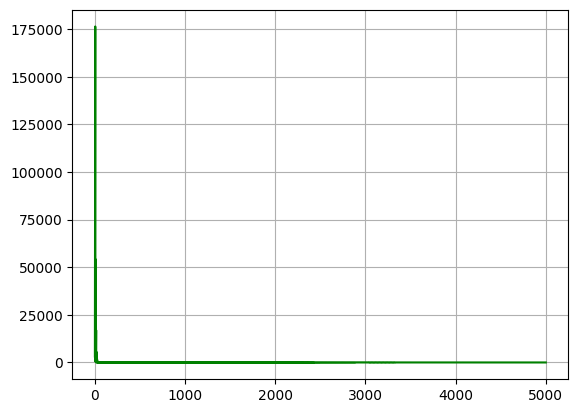

In [ ]:
fig,ax=plt.subplots()
ax.plot(cost_history,'g-')
plt.grid()
plt.show()

This plot shows how 'theta0' influences the cost function and how the gradient descent algorithm adjusts 'theta0' to minimize the cost.

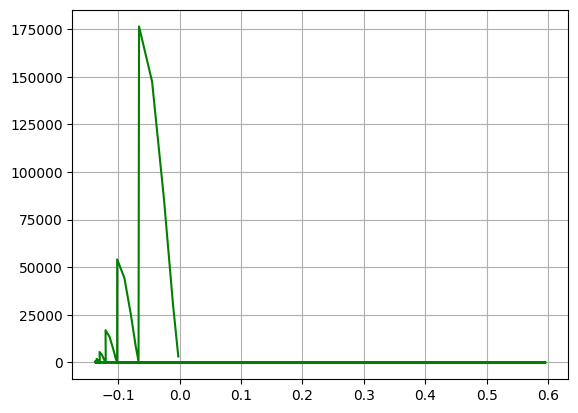

In [ ]:
fig,ax=plt.subplots()
ax.plot(theta0_history,cost_history,'g-')
plt.grid()
plt.show()

This plot shows how 'theta1' influences the cost function and how the gradient descent algorithm adjusts 'theta1' to minimize the cost.

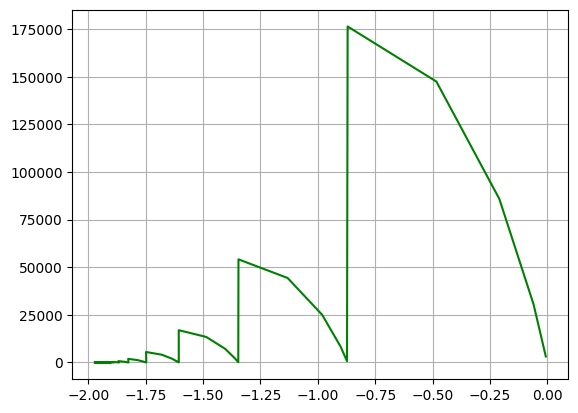

In [ ]:
fig,ax=plt.subplots()
ax.plot(theta1_history,cost_history,'g-')
plt.grid()
plt.show()